In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/home/jovyan/Ames_ModelFitting/ipynb'

In [3]:
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")

In [66]:
print("train : " + str(train.shape))
print("test : " + str(test.shape))

train : (1451, 75)
test : (1459, 74)


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
train.dtypes.reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


In [8]:
missingval_train = train.isnull().sum().sort_values(ascending=False)

In [9]:
missingval_train

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [10]:
train_mask = (missingval_train)/1460 > 0.10
missingval_train[train_mask].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [11]:
missing_list=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage']
train = train.drop(missing_list, axis=1)
test = test.drop(missing_list, axis=1)

In [12]:
print("train : " + str(train.shape))
print("test : " + str(train.shape))

train : (1460, 75)
test : (1460, 75)


In [13]:
for column in train.select_dtypes(['object']).columns:
    train[column] = train[column].astype('category')

train.MSSubClass = train.MSSubClass.astype('category')
train.OverallQual = train.OverallQual.astype('category')
train.OverallCond = train.OverallCond.astype('category')
train.BsmtFullBath = train.BsmtFullBath.astype('category')
train.BsmtHalfBath = train.BsmtHalfBath.astype('category')
train.FullBath = train.FullBath.astype('category')
train.HalfBath = train.HalfBath.astype('category')
train.BedroomAbvGr = train.BedroomAbvGr.astype('category')
train.KitchenAbvGr = train.KitchenAbvGr.astype('category')
train.TotRmsAbvGrd = train.TotRmsAbvGrd.astype('category')
train.Fireplaces = train.Fireplaces.astype('category')
train.GarageCars = train.GarageCars.astype('category')
train.MoSold = train.MoSold.astype('category')

train.MasVnrArea.fillna(train.MasVnrArea.mean(), inplace=True)
train.GarageYrBlt.fillna(train.GarageYrBlt.mean(), inplace=True)


empty_means_without = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                        "BsmtFinType2","GarageType","GarageFinish",
                        "GarageQual","GarageCond"]

def replace_empty(feature, value):
    train[feature].cat.add_categories([value], inplace=True)
    train[feature].fillna(value, inplace=True)


for feature in empty_means_without:
    replace_empty(feature, "None")

train.dropna(inplace=True)

numeric_train_df = train.select_dtypes(exclude=['category']).copy()
numeric_train_df.drop("SalePrice", axis=1, inplace=True)

In [77]:
for column in test.select_dtypes(['object']).columns:
    test[column] = test[column].astype('category')

test.MSSubClass = test.MSSubClass.astype('category')
test.OverallQual = test.OverallQual.astype('category')
test.OverallCond = test.OverallCond.astype('category')
test.BsmtFullBath = test.BsmtFullBath.astype('category')
test.BsmtHalfBath = test.BsmtHalfBath.astype('category')
test.FullBath = test.FullBath.astype('category')
test.HalfBath = test.HalfBath.astype('category')
test.BedroomAbvGr = test.BedroomAbvGr.astype('category')
test.KitchenAbvGr = test.KitchenAbvGr.astype('category')
test.TotRmsAbvGrd = test.TotRmsAbvGrd.astype('category')
test.Fireplaces = test.Fireplaces.astype('category')
test.GarageCars = test.GarageCars.astype('category')
test.MoSold = test.MoSold.astype('category')

test.MasVnrArea.fillna(test.MasVnrArea.mean(), inplace=True)
test.GarageYrBlt.fillna(test.GarageYrBlt.mean(), inplace=True)


empty_means_without = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                        "BsmtFinType2","GarageType","GarageFinish",
                        "GarageQual","GarageCond"]

def replace_empty(feature, value):
    test[feature].cat.add_categories([value], inplace=True)
    test[feature].fillna(value, inplace=True)


for feature in empty_means_without:
    replace_empty(feature, "None")


In [14]:
train.shape

(1451, 75)

In [55]:
numeric_train_df.dtypes.value_counts()

int64      21
float64     2
dtype: int64

In [51]:
train.dtypes.value_counts()

category    51
int64       22
float64      2
dtype: int64

# Outlier

In [15]:
def display_outliers(dataframe, col, param=1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey_window = param*(Q3-Q1)
    less_than_Q1 = dataframe[col] < Q1 - tukey_window
    greater_than_Q3 = dataframe[col] > Q3 + tukey_window
    tukey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe[tukey_mask]

In [17]:
numeric_train_log_df = np.log(numeric_train_df + 1)
numeric_train_log_sc_df = (numeric_train_log_df - numeric_train_log_df.mean())/numeric_train_log_df.std()

In [20]:
for col in numeric_train_log_sc_df:
    print(col, display_outliers(numeric_train_log_sc_df, col).shape)

Id (69, 23)
LotArea (128, 23)
YearBuilt (9, 23)
YearRemodAdd (0, 23)
MasVnrArea (0, 23)
BsmtFinSF1 (0, 23)
BsmtFinSF2 (167, 23)
BsmtUnfSF (125, 23)
TotalBsmtSF (52, 23)
1stFlrSF (7, 23)
2ndFlrSF (0, 23)
LowQualFinSF (26, 23)
GrLivArea (10, 23)
GarageYrBlt (1, 23)
GarageArea (84, 23)
WoodDeckSF (0, 23)
OpenPorchSF (0, 23)
EnclosedPorch (207, 23)
3SsnPorch (24, 23)
ScreenPorch (116, 23)
PoolArea (7, 23)
MiscVal (52, 23)
YrSold (0, 23)


In [21]:
from collections import Counter

In [33]:
raw_outliers = []
for col in numeric_train_log_sc_df:
    outlier_df = display_outliers(numeric_train_log_sc_df, col)
    raw_outliers += list(outlier_df.index)
outlier_count = Counter(raw_outliers)
outliers = [k for k,v in outlier_count.items() if v > 4]

In [34]:
outliers

[197, 1298, 533, 705]

In [32]:
len(outliers)

18

In [36]:
numeric_train_out_df = numeric_train_log_sc_df.drop(outliers, axis=0)
train_outliers_removed_df = train.drop(outliers, axis=0)

In [39]:
train_outliers_removed_df.shape

(1447, 75)

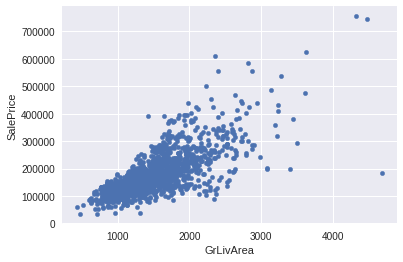

In [44]:
train_outliers_removed_df.plot.scatter(x='GrLivArea',y='SalePrice')

The datapoint at the bottom right seems to be an outlier as it does not follow the general shape of the linear model, also according to the original research it was stated to be an outlier. There was one other point further to the right but was already discarded by out previous outlier analysis.

In [42]:
GrLivArea_outliers = train_outliers_removed_df['GrLivArea'] < 4500

In [43]:
GrLivArea_outliers

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1430    True
1431    True
1432    True
1433    True
1434    True
1435    True
1436    True
1437    True
1438    True
1439    True
1440    True
1441    True
1442    True
1443    True
1444    True
1445    True
1446    True
1447    True
1448    True
1449    True
1450    True
1451    True
1452    True
1453    True
1454    True
1455    True
1456    True
1457    True
1458    True
1459    True
Name: GrLivArea, dtype: bool

In [45]:
train_outliers_removed_df = train_outliers_removed_df[GrLivArea_outliers]

In [46]:
train_outliers_removed_df.shape

(1446, 75)

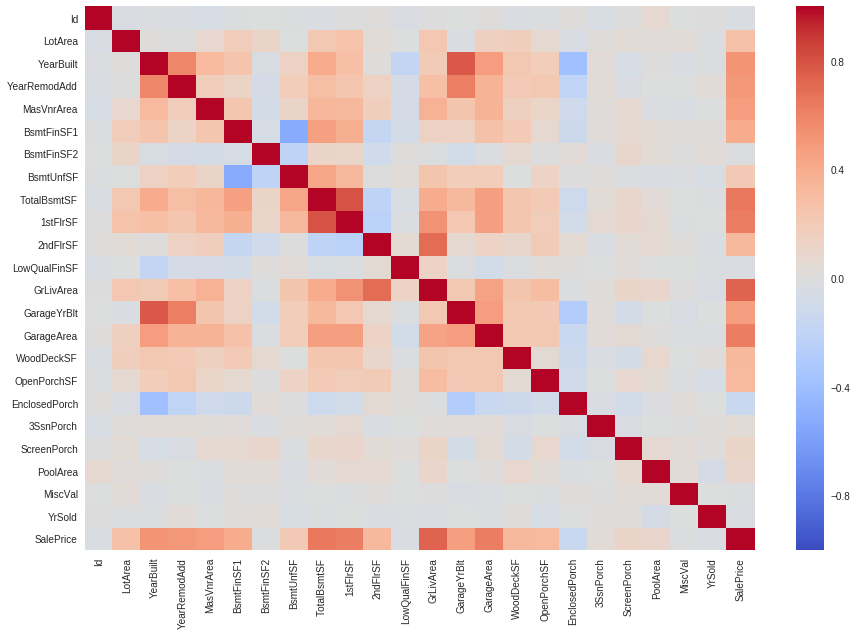

In [60]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_outliers_removed_df.corr(),cmap = 'coolwarm')

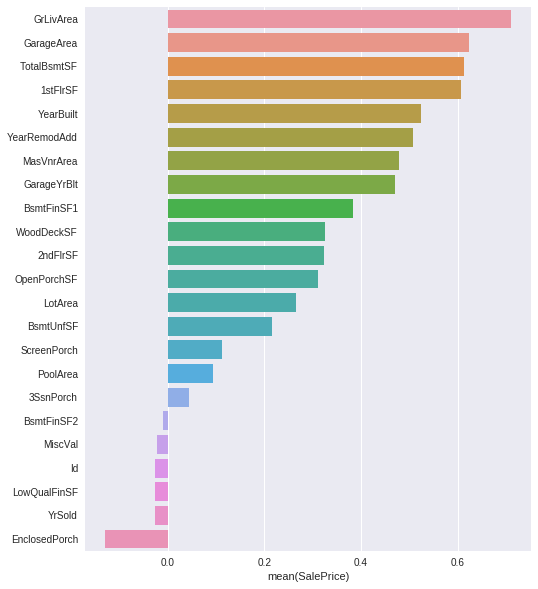

In [64]:
numerical_features_df = train.select_dtypes(exclude=['category'])
numerical_features_corr = numerical_features_df.corr()
corr = numerical_features_corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [65]:
train_outliers_removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Data columns (total 75 columns):
Id               1446 non-null int64
MSSubClass       1446 non-null category
MSZoning         1446 non-null category
LotArea          1446 non-null int64
Street           1446 non-null category
LotShape         1446 non-null category
LandContour      1446 non-null category
Utilities        1446 non-null category
LotConfig        1446 non-null category
LandSlope        1446 non-null category
Neighborhood     1446 non-null category
Condition1       1446 non-null category
Condition2       1446 non-null category
BldgType         1446 non-null category
HouseStyle       1446 non-null category
OverallQual      1446 non-null category
OverallCond      1446 non-null category
YearBuilt        1446 non-null int64
YearRemodAdd     1446 non-null int64
RoofStyle        1446 non-null category
RoofMatl         1446 non-null category
Exterior1st      1446 non-null category
Exterior2nd      1446 non

# Write

In [68]:
matrix_df = train_outliers_removed_df.drop(['Id','SalePrice'],axis=1)

In [70]:
target_df = train_outliers_removed_df['SalePrice']

In [73]:
matrix_df.to_csv('../Data/matrix.csv')

In [74]:
target_df.to_csv('../Data/target.csv')

In [75]:
final_train = train_outliers_removed_df.drop(['Id'],axis=1)

In [76]:
final_train.to_csv('../Data/final_train.csv')

In [85]:
test_2 = test.drop(['Id'],axis=1)

In [86]:
test_2.to_csv('../Data/test_2.csv')